**1)   Our objective function is 𝑦=𝑓(𝑥)=sin6𝑥+cos4𝑥+𝑥2**

**2)   We want to find the minimum y and the corresponding x*.**

In [159]:
#importing important libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor


**3)   (10 points) We want to search the minimum on the grid -4<= x <= 4 with dx =0.01.**

In [160]:
x = np.atleast_2d(np.linspace(-4,4,801)).T  #grid search with -4<= x <= 4 with dx =0.01
x.T

array([[-4.  , -3.99, -3.98, -3.97, -3.96, -3.95, -3.94, -3.93, -3.92,
        -3.91, -3.9 , -3.89, -3.88, -3.87, -3.86, -3.85, -3.84, -3.83,
        -3.82, -3.81, -3.8 , -3.79, -3.78, -3.77, -3.76, -3.75, -3.74,
        -3.73, -3.72, -3.71, -3.7 , -3.69, -3.68, -3.67, -3.66, -3.65,
        -3.64, -3.63, -3.62, -3.61, -3.6 , -3.59, -3.58, -3.57, -3.56,
        -3.55, -3.54, -3.53, -3.52, -3.51, -3.5 , -3.49, -3.48, -3.47,
        -3.46, -3.45, -3.44, -3.43, -3.42, -3.41, -3.4 , -3.39, -3.38,
        -3.37, -3.36, -3.35, -3.34, -3.33, -3.32, -3.31, -3.3 , -3.29,
        -3.28, -3.27, -3.26, -3.25, -3.24, -3.23, -3.22, -3.21, -3.2 ,
        -3.19, -3.18, -3.17, -3.16, -3.15, -3.14, -3.13, -3.12, -3.11,
        -3.1 , -3.09, -3.08, -3.07, -3.06, -3.05, -3.04, -3.03, -3.02,
        -3.01, -3.  , -2.99, -2.98, -2.97, -2.96, -2.95, -2.94, -2.93,
        -2.92, -2.91, -2.9 , -2.89, -2.88, -2.87, -2.86, -2.85, -2.84,
        -2.83, -2.82, -2.81, -2.8 , -2.79, -2.78, -2.77, -2.76, -2.75,
      

Defining objective function


In [161]:
np.random.seed(0)
def func(x):
    return (np.sin(6* x) + np.cos(4 * x) + x**2)

In [162]:
y_values = func(x)
y_min = np.min(y_values)
x_min = x[np.where(y_values == y_min)]

In [163]:
x_min

array([0.76])

**2)   We want to find the minimum y and the corresponding x*.**

In [164]:
print("The Minimum y* value is {:.4f} for corresponding x* value {:.4f} ".format(y_min,x_min[0]))

The Minimum y* value is -1.4057 for corresponding x* value 0.7600 


**4)   (10 points) My initial condition (points) is:**

**xini : [-2.76-2.122.583.783.99-2.74-2.862.29-0.69-3.48]**   **And y = f(xini)**

**5)   (20 points) Construct GP framework to estimate all the y on the given grid.a.   Use “kernel = C(1.0, (1e-3, 1e3)) * RBF(1., (1e-2, 1e2))”**

In [165]:
X = np.array([-2.76, -2.12, 2.58, 3.78, 3.99, -2.74, -2.86, 2.29, -0.69, -3.48])
y = func(X).ravel()
print("The values of y corresponding to x_initial(xini):\n",y)

The values of y corresponding to x_initial(xini):
 [ 8.41463416  3.7554514   6.25704839 12.82067696 14.0223092   8.14041919
  9.60249581  5.20110991  0.38863669 11.42965515]


In [166]:
X_10,y_10 = X,y

**5)   (20 points) Construct GP framework to estimate all the y on the given grid.a.   Use “kernel = C(1.0, (1e-3, 1e3)) * RBF(1., (1e-2, 1e2))”**

In [167]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(1., (1e-2, 1e2))

In [168]:
X = X.reshape(-1,1)

In [169]:
#the Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 10)
gp.fit(X,y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [170]:
#predicting on the grid search (x)
mu, sigma = gp.predict(x,return_std = True)

In [171]:
mu    #mean

array([ 9.14529000e+00,  9.26029145e+00,  9.37294187e+00,  9.48314566e+00,
        9.59081145e+00,  9.69585231e+00,  9.79818608e+00,  9.89773559e+00,
        9.99442890e+00,  1.00881996e+01,  1.01789868e+01,  1.02667358e+01,
        1.03513978e+01,  1.04329303e+01,  1.05112972e+01,  1.05864689e+01,
        1.06584226e+01,  1.07271422e+01,  1.07926182e+01,  1.08548484e+01,
        1.09138371e+01,  1.09695957e+01,  1.10221424e+01,  1.10715023e+01,
        1.11177071e+01,  1.11607953e+01,  1.12008118e+01,  1.12378079e+01,
        1.12718411e+01,  1.13029750e+01,  1.13312789e+01,  1.13568274e+01,
        1.13797007e+01,  1.13999837e+01,  1.14177660e+01,  1.14331415e+01,
        1.14462079e+01,  1.14570665e+01,  1.14658219e+01,  1.14725810e+01,
        1.14774534e+01,  1.14805504e+01,  1.14819844e+01,  1.14818691e+01,
        1.14803184e+01,  1.14774460e+01,  1.14733654e+01,  1.14681887e+01,
        1.14620267e+01,  1.14549878e+01,  1.14471781e+01,  1.14387008e+01,
        1.14296552e+01,  

In [172]:
sigma  #Standard deviation

array([4.56883327e+00, 4.47353836e+00, 4.37695746e+00, 4.27916247e+00,
       4.18022899e+00, 4.08023617e+00, 3.97926659e+00, 3.87740617e+00,
       3.77474397e+00, 3.67137211e+00, 3.56738550e+00, 3.46288176e+00,
       3.35796095e+00, 3.25272540e+00, 3.14727950e+00, 3.04172945e+00,
       2.93618304e+00, 2.83074940e+00, 2.72553875e+00, 2.62066212e+00,
       2.51623111e+00, 2.41235758e+00, 2.30915340e+00, 2.20673015e+00,
       2.10519883e+00, 2.00466955e+00, 1.90525128e+00, 1.80705151e+00,
       1.71017600e+00, 1.61472843e+00, 1.52081017e+00, 1.42851994e+00,
       1.33795358e+00, 1.24920372e+00, 1.16235956e+00, 1.07750656e+00,
       9.94726236e-01, 9.14095880e-01, 8.35688349e-01, 7.59571834e-01,
       6.85809664e-01, 6.14460107e-01, 5.45576194e-01, 4.79205562e-01,
       4.15390302e-01, 3.54166838e-01, 2.95565814e-01, 2.39612004e-01,
       1.86324241e-01, 1.35715364e-01, 8.77921863e-02, 4.25554833e-02,
       1.98509419e-05, 3.98855113e-02, 7.71182397e-02, 1.11721270e-01,
      

**6)   (20 points) Finding the next point by lcb acquisition function with a parameter 2. i.e.,a.𝐿𝐶𝐵(𝑥)=𝑦𝐺𝑃(𝑥)―2𝜎𝐺𝑃** 

In [173]:
#calculating LCB by using the parameter given in question:
lcb = mu.ravel() - (2 * sigma)
lcb

array([ 7.62345091e-03,  3.13214727e-01,  6.19026954e-01,  9.24820717e-01,
        1.23035346e+00,  1.53537997e+00,  1.83965290e+00,  2.14292326e+00,
        2.44494095e+00,  2.74545534e+00,  3.04421582e+00,  3.34097232e+00,
        3.63547594e+00,  3.92747951e+00,  4.21673819e+00,  4.50301002e+00,
        4.78605654e+00,  5.06564335e+00,  5.34154073e+00,  5.61352415e+00,
        5.88137489e+00,  6.14488055e+00,  6.40383563e+00,  6.65804200e+00,
        6.90730946e+00,  7.15145618e+00,  7.39030920e+00,  7.62370485e+00,
        7.85148914e+00,  8.07351819e+00,  8.28965856e+00,  8.49978757e+00,
        8.70379359e+00,  8.90157631e+00,  9.09304693e+00,  9.27812838e+00,
        9.45675543e+00,  9.62887478e+00,  9.79444517e+00,  9.95343735e+00,
        1.01058341e+01,  1.02516301e+01,  1.03908320e+01,  1.05234580e+01,
        1.06495378e+01,  1.07691124e+01,  1.08822338e+01,  1.09889647e+01,
        1.10893782e+01,  1.11835571e+01,  1.12715938e+01,  1.13535898e+01,
        1.14296155e+01,  

In [174]:
#calculating the min LCB
lcb_min = min(lcb)
lcb_min

-14.777498888078588

In [175]:
lcb.shape

(801,)

In [176]:
#the min x (x* )corresponding to min LCB 
x_grid_min = np.take(x,np.where(lcb == lcb_min))
x_grid_min

array([[0.67]])

**7)   (20 points) Add the next point xnext and evaluate the function value ynext = f(xnext).**

In [177]:
if x_grid_min not in X: X = np.append(X,x_grid_min)
print("X initial with 11(10 +1) data points: \n",X)

X initial with 11(10 +1) data points: 
 [-2.76 -2.12  2.58  3.78  3.99 -2.74 -2.86  2.29 -0.69 -3.48  0.67]


In [178]:
y = func(X)

In [179]:
print('The values of y for the corresponding x values are: \n', y)

The values of y for the corresponding x values are: 
 [ 8.41463416  3.7554514   6.25704839 12.82067696 14.0223092   8.14041919
  9.60249581  5.20110991  0.38863669 11.42965515 -1.21616745]


In [180]:
#the shape of X,y that includes new data points
print("X.shape:",X.shape)
print("y.shape:",y.shape)

X.shape: (11,)
y.shape: (11,)


In [181]:
X_11,y_11 = X,y

**8)   (20 points) Do it iteratively until GP framework give us the same point for the minimum.** 

    a.   Please plot GP result with uncertainty for the first iteration (with 10 initial data points)
    b.   Please plot GP result with uncertainty for the second iteration (with 11 data points).
    c.    Please plot GP result with uncertainty for the last iteration (with 10 + n data points)
    d.   Show the your updated x data (10 + n data points)

**Performance of  GP iteratively.**

The first iteration is already completed in the previous code cells. The code shown below will perform GP from second iteration. 

In [182]:
iteration = 1  #number of of iterations
final_X,final_y = [],[]

while True:
        
    X = X.reshape(-1,1)
    gp.fit(X,y)
   
    mu, sigma = gp.predict(x,return_std = True)
    
    lcb = mu.ravel() - 2 * sigma
    lcb_min = min(lcb)
    x_grid_min = np.take(x,np.where(lcb == lcb_min))
    
  
    if x_grid_min not in X: 
        X = np.append(X,x_grid_min)
    else:
        final_X = X
        final_y = y
        break
    y = func(X)

    iteration += 1
        
    print("Iteration {}:".format(iteration))
    print("X:",X)
    print("y:",y)
    print("lcb_min: {}, x_grid_min: {}".format(lcb_min,x_grid_min))
    print("X_shape:{}, y_shape:{}".format(X.shape,y.shape))
    print("...............................................................................................")

Iteration 2:
X: [-2.76 -2.12  2.58  3.78  3.99 -2.74 -2.86  2.29 -0.69 -3.48  0.67  1.36]
y: [ 8.41463416  3.7554514   6.25704839 12.82067696 14.0223092   8.14041919
  9.60249581  5.20110991  0.38863669 11.42965515 -1.21616745  3.46822818]
lcb_min: -12.335789532376516, x_grid_min: [[1.36]]
X_shape:(12,), y_shape:(12,)
...............................................................................................
Iteration 3:
X: [-2.76 -2.12  2.58  3.78  3.99 -2.74 -2.86  2.29 -0.69 -3.48  0.67  1.36
  0.02]
y: [ 8.41463416  3.7554514   6.25704839 12.82067696 14.0223092   8.14041919
  9.60249581  5.20110991  0.38863669 11.42965515 -1.21616745  3.46822818
  1.11691391]
lcb_min: -12.056475015189996, x_grid_min: [[0.02]]
X_shape:(13,), y_shape:(13,)
...............................................................................................
Iteration 4:
X: [-2.76 -2.12  2.58  3.78  3.99 -2.74 -2.86  2.29 -0.69 -3.48  0.67  1.36
  0.02 -1.19]
y: [ 8.41463416  3.7554514   6.25704839 12.82

In [183]:
#plot function
def plot_func(gp,x,func,X,y):
    
    X = X.reshape(-1,1)
    gp.fit(X,y)
    mu,sigma = gp.predict(x,return_std = True)
    
    plt.figure(figsize = [15,10])
    plt.plot(x, func(x), 'r-', label = "f(x) = (np.sin(6* x) + np.cos(4 * x) + x**2)")
    plt.scatter(X.ravel(), y, label = "Observations")
    plt.plot(x,mu, 'g', label = "Prediction")
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([mu - 1.96 * sigma,(mu + 1.96 * sigma)[::-1]]),
             alpha = 0.2, fc = 'b', ec = 'None', label = '95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend(loc = "upper left")

**a. Please plot GP result with uncertainty for the first iteration (with 10 initial data points)**

In [184]:
print("X.shape:",X_10.shape)
print("y_shape:",y_10.shape)

X.shape: (10,)
y_shape: (10,)


GP result with uncertainty for the first iteration with 10 initial data points)


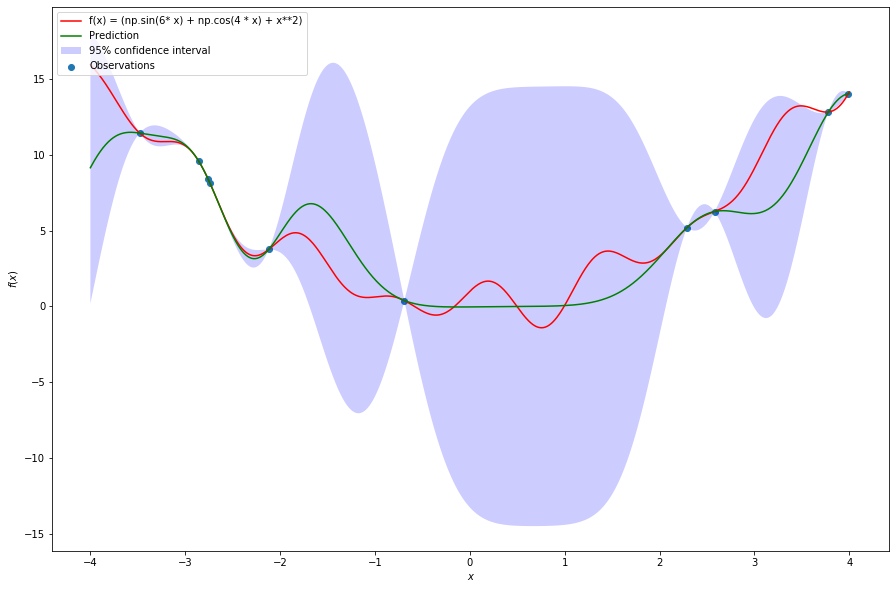

In [185]:
print("GP result with uncertainty for the first iteration with 10 initial data points)")
plot_func(gp,x,func,X_10,y_10)

**b.   Please plot GP result with uncertainty for the second iteration (with 11 data points).**

In [186]:
print("X.shape:",X_11.shape)
print("y_shape:",y_11.shape)

X.shape: (11,)
y_shape: (11,)


GP result with uncertainty for the second iteration with 11 data points


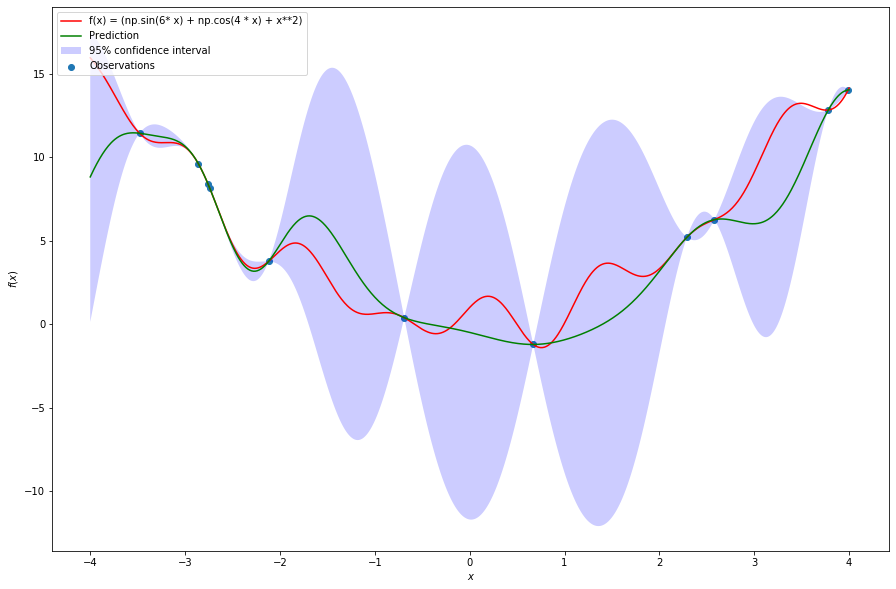

In [187]:
print("GP result with uncertainty for the second iteration with 11 data points")
plot_func(gp,x,func,X_11,y_11)

**c.    Please plot GP result with uncertainty for the last iteration (with 10 + n data points)**

In [188]:
print("X.shape:",final_X.shape)
print("y_shape:",final_y.shape)

X.shape: (18, 1)
y_shape: (18,)


In [189]:
print("The final X_shape:",final_X.shape)

The final X_shape: (18, 1)


GP result with uncertainty for the last iteration with 10 + 8 data points


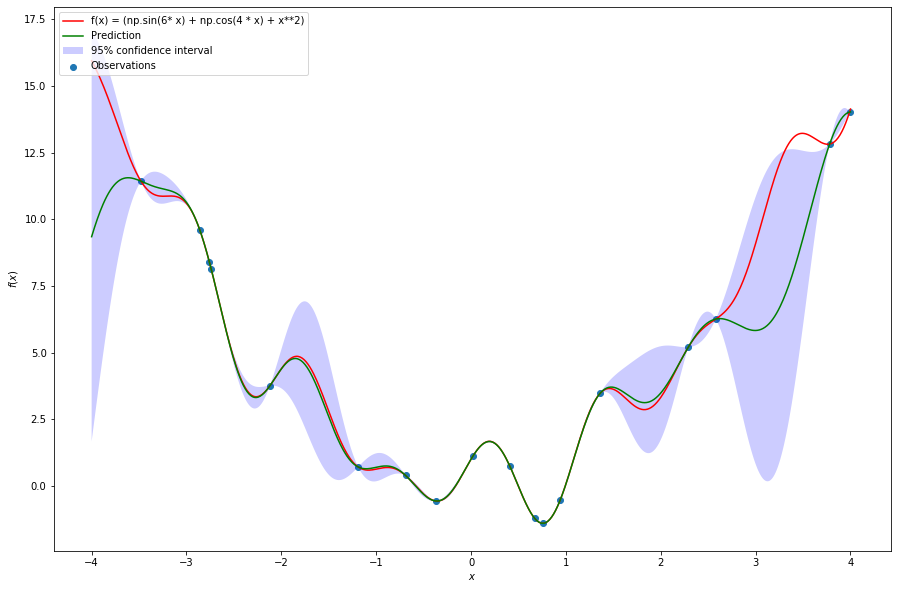

In [190]:
print("GP result with uncertainty for the last iteration with 10 + 8 data points")
plot_func(gp,x,func,final_X,final_y)

**d. Show the your updated x data (10 + n data points)**

In [191]:
print("The final updated x data with 18(10 + 8) data points \n",X)

The final updated x data with 18(10 + 8) data points 
 [[-2.76]
 [-2.12]
 [ 2.58]
 [ 3.78]
 [ 3.99]
 [-2.74]
 [-2.86]
 [ 2.29]
 [-0.69]
 [-3.48]
 [ 0.67]
 [ 1.36]
 [ 0.02]
 [-1.19]
 [ 0.41]
 [ 0.94]
 [-0.37]
 [ 0.76]]
